In [108]:
import random
import numpy as np
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statistics

 
class Mastermind: 
    def __init__(self, user, n_games = 1):

        # Variables utilisées tout au long du programme : 
    
        # liste qui va contenir la solution générée par l'ia au début d'une partie
        self.liste_solution = []

        # liste qui va contenir la combinaison du joueur à chaque tour
        self.liste_proposition = []

        # variables compteurs qui vont indiquer combien de couleurs bien placées
        # et mal placées à chaque tour
        self.nombre_mal_place = 0
        self.nombre_bien_place = 0

        # variable qu'on incrémente à chaque tour
        self.tour = 1 

        # booléen qui prend True quand on trouve la bonne combinaison
        self.partie_gagne = False

        # dictionnaire qui va stocker toutes les combinaisons testées par le joueur 
        # ainsi que les bonnes et mauvaises réponses associées
        self.dict_actions_precedentes = {}

        # liste de toutes les couleurs disponibles
        self.couleur = ["rouge", "jaune", "bleu", "vert", "noire", "orange", "gris", "marron"]

        # booléen qui permettra d'utiliser certaines fonctions spécifiques pour 
        # l'IaSmart
        self.ia_smart = False

        self.user = user

        # variables qui vont être utiles quand on veut simuler n_parties
        self.n_games = n_games
        self.compteur_victoires = 0
        self.tours_necessaires_victoire = []
        
 
    # fonction qui va retourner la solution pour la partie qu'on commence 
    def initialisation_jeu(self):    
 
        # partie_gagne vaut false quand on initialise une partie, important quand 
        # on fait n parties

        # tour prend 1, pour la même raison
        
        # On initialise la partie en générant la solution (4 couleurs diférentes) 
        # qu'on met dans une liste

        print("Nouvelle partie")
        self.partie_gagne = False
        self.tour = 1 
        self.dict_actions_precedentes = {}
        self.liste_solution = random.sample(self.couleur, k=4) 

        # si vous voulez avoir la solution en débutant la partie :

        #print(f'La solution choisie par le jeu : {self.liste_solution}')
        self.liste_proposition = []
    
 
    # fonction qui va comparer la proposition du joueur à la solution
    def comparaison_de_grille(self):  

        # si la proposition du joueur correspond à la solution le joueur gagne la partie
        if self.liste_proposition == self.liste_solution: 
          self.partie_gagne = True
        
        # sinon on va tester pour chaque "case" de proposition et la comparer à celle 
        # de la solution
        else:
            for case in range(4):
              # si la couleur est la bonne, la variable s'incrémente
              if self.liste_proposition[case] == self.liste_solution[case]:
                self.nombre_bien_place += 1
              else:
                 #check les 3 autres cases, si elle sont mal placées la variable
                 #s'incrémente
                for compteur in range(1,4):     
                  autre_case_a_comparer = (case + compteur) 
                 # modulo 4, si check la case 3 + 2 par exemple, case 6 existe pas, on veut check la
                 #case 2 -> 6  modulo 4 = 2
                  if self.liste_proposition[autre_case_a_comparer % 4] == self.liste_solution[case] :  
                    self.nombre_mal_place += 1
 
    def fin_de_tour(self):
 
        # On remplit le dictionnaire qui récapitule nos actions et résulats précédents par tour
        # et on l'affiche
        self.dict_actions_precedentes[self.tour] = [self.liste_proposition, self.nombre_bien_place, self.nombre_mal_place]
        pprint(self.dict_actions_precedentes)
        print("\n")
 
        # On reset nos compteurs de couleurs bien ou mal placées
        self.nombre_bien_place = 0   
        self.nombre_mal_place = 0 
 
        # On incrémente la variable pour nous faire passer au tour suivant
        self.tour += 1
     
    # fonction qu'on appelle à chaque tour et qui va faire tourner 
    def tour_de_jeu(self):    
        
        # tant que le joueur n'a pas gagné, on va lui demander une combinaison de 
        # couleur, la comparer à la solution et lui dire ce qu'il a de bien ou 
        # de mal placé

        if self.partie_gagne is False:

          # fonction où on demande au joueur une combinaison
          # chaque classe fille a une fonction remplir_une_grille spécifique 
          self.remplir_une_grille()

          # compare les grilles pour connaître les nombres de billes bien placées  
          # et mal placées
          self.comparaison_de_grille()    
          print(f'Couleurs proposées : {self.liste_proposition}')
          print(f"Couleurs bien placées : {self.nombre_bien_place}")
          print(f"Couleurs mal placées : {self.nombre_mal_place}")  
          print("\n")
 
          # fonction de l'ia smart qu'on utilisera seulement si l'ia smart joue
          if self.ia_smart == True:
            self.parcours_ensemble()
            self.clean_l_ensemble()
 
        # si partie_gagne est vrai alors le joueur gagne la partie
        # sinon c'est la fin du tour
        if self.partie_gagne is True:    
           print(f"Partie gagnée, bravo {self.user} ! Cela t'a pris seulement {self.tour} tours pour y arriver, you're so french !")
           print(f'La solution était {self.liste_solution}')
           print("\n")
        else:
          self.fin_de_tour()

         # fonction qui lancera notre partie, elle appelera d'abord la fonction  
         # d'initialisation puis celle du tour de jeu, tant qu'on a pas gagné ou
         # qu'on n'est pas au tour 13
    def lancer_une_partie(self): 
        self.initialisation_jeu()
 
        while self.partie_gagne is False and self.tour < 13:
          self.tour_de_jeu()
        
        # si le tour suivant qu'on s'apprête à jouer est le 13ème, et que le joueur 
        # n'a pas trouvé la solution, alors il a perdu
        if self.tour == 13:    
          print(f"Partie perdue, t'es mauvais {self.user} !")
          print(f'La solution était {self.liste_solution}')
          print("\n")

    # fonction qui permet de lancer n parties, assez similaire à celle vue en cours
    # chaque fois que partie_gagne est vraie on incrémente un compteur 
    # et on met dans une liste le nombre de tours qu'il a fallu pour gagner
    # => utile pour les stats
    def lancer_n_parties(self):

      for game in range(self.n_games):

        self.lancer_une_partie()
        if self.partie_gagne is True:
          self.compteur_victoires += 1
          self.tours_necessaires_victoire.append(self.tour)
          

        if self.ia_smart is True:
          self.instanciation_de_l_ensemble_des_possibilites()
        #print(f'{self.compteur_victoires} parties gagnées pour {self.n_games} parties jouées')
      


# classe du joueur humain, avec sa fonction remplir_une_grille spécifique

class Joueur(Mastermind):
 
  def __init__(self, user, n_games = 1):
      super().__init__(user, n_games)
 
  def remplir_une_grille(self):
 
        # liste locale dans laquelle on mettra les couleurs choisies par le joueur
        liste_couleurs_joueur = [0,0,0,0] 
 
        #liste de couleurs disponibles à la sélection
 
        self.choix_possible = ["rouge", "jaune", "bleu", "vert", "noire", "orange", "gris", "marron"] 
        
        for case in range(4): # pour chaque case on va choisir une couleur
 
            # On indique la case qu'on doit remplir 
            print (f"Rentrez la couleur de la case {case}. Vous avez le choix entre {len(self.choix_possible)} couleurs") 
 
            # et les couleurs de boule qui sont dispos
            print(self.choix_possible, "\n")   
 
            # on demande au joueur de remplir la case
            liste_couleurs_joueur[case] = input() 
            
            couleur_choisie = False
 
            # on vérifie grâce à une boucle que  le joueur a choisi à une des couleurs choisies 
            while couleur_choisie is False: 
              
              for couleur in self.choix_possible:
 
                if liste_couleurs_joueur[case] == couleur:  
                  # si la couleur choisie correspond à une des couleurs dispos, 
                  # on la supprime des choix possibles et on sort de la boucle  
                  self.choix_possible.remove(liste_couleurs_joueur[case])
                  couleur_choisie = True
              
              # sinon on repropose au joueur de rentrer une couleur
              if couleur_choisie is False: 
                print("Vous devez choisir une des couleurs restantes !")
                print(self.choix_possible)
                liste_couleurs_joueur[case] = input()
        
        # on donne les valeurs de la liste local à liste_proposition pour l'utiliser
        # dans les autres fonctions
        self.liste_proposition = liste_couleurs_joueur
 

# classe de l'IA Dumb, sa fonction remplir_une_grille renvoit une combinaison 
# aléatoire à chaque fois 

class IaDumb(Mastermind):
 
    def __init__(self,user, n_games = 1):
        super().__init__(user, n_games)
   
    def remplir_une_grille(self):
 
        self.liste_proposition = random.sample(self.couleur, k=4)


# classe de l'IA Smart
# sa fonction remplir_une_grille va aussi renvoyer une combinaison aléatoire
# Ia Smart est smart car après chaque proposition comparée, elle va déduire quelles 
# sont les combinaisons qui sont impossibles dans les 1680 possibles et les retirer.
# A chaque tour la liste des possibilités va se réduire jusqu'à ce qu'elle 
# tombe sur la bonne ou qu'elle ait éliminée toutes celles qui sont impossibles
 
class IaSmart(Mastermind):
 
    def __init__(self,user, n_games = 1):
 
      super().__init__(user, n_games)
 
 
      # liste de l'ensemble des combinaisons possibles pour notre jeu :
      # 4 cases et 8 couleurs : 1680 possibiltés
      self.liste_ensemble = []   

      # combinaison de couleurs prise dans l'ensemble des possibilités qu'on va
      # tester pour savoir si on la garde ou pas
      self.liste_test = []   

      # liste des combinaisons à enlever de l'ensemble des possiblités 
      self.liste_a_delete = []   
 
      self.liste_proposition = [ 0, 0, 0, 0]

      # booléen qui prend quand on utilise un objet IaSmart
      self.ia_smart = True
 

    # on remplit notre liste de toutes les combinaisons possibles (1680)
    def instanciation_de_l_ensemble_des_possibilites(self):
 
      self.liste_ensemble = []
 
      for a in self.couleur:
        for b in self.couleur:
          for c in self.couleur:
            for d in self.couleur:
              if (a!=b) and (a!=c) and (a!=d) and (b!=c) and (b!=d) and (c!=d):
                self.liste_ensemble.append([a,b,c,d])
 
 
   # on enlève de l'ensemble des possibiltés (liste_ensemble)  
   # toutes les combinaisons que l'ia considère comme impossible (liste_a_delete)
    def clean_l_ensemble (self):

      l = []
      print(f'Le nombre de combinaisons possibles avant la suppression : {len(self.liste_ensemble)}')
      print(f'Le nombre de combinaisons quon veut enlever : {len(self.liste_a_delete)}')
      cpt = 0
      for combinaison in range(len(self.liste_a_delete)):
        l = self.liste_ensemble[self.liste_a_delete[combinaison] - cpt]
        self.liste_ensemble.remove(l)
        cpt +=1
      
      if len(self.liste_ensemble) != 1:
        if self.liste_proposition in self.liste_ensemble:
          self.liste_ensemble.remove(self.liste_proposition)

      print(f'Le nombre de combinaisons possibles après la suppression : {len(self.liste_ensemble)}')
      print("\n")
 

 # les trois prochaines fonctions vont tester chaque possibilité et regarder
 # si elles ont les mêmes nombres de couleurs bien placées ou mal placées que celle 
 # proposée par l'IaSmart au tour où on se trouve
 # elles vont trouver quelles sont les combinaisons qui sont encore possibles, 
 # qui "survivent" et supprimer les autres 

    def condition_survie_bien_place(self):
 
      case = 0
      while self.condition_de_survie_bien_place != self.nombre_bien_place and case < 4: 
        
        #compare la liste proposée par l'ia à une des liste possibles que l'on est 
        # en train de tester
        if self.liste_proposition[case] == self.liste_test[case]:   
          self.condition_de_survie_bien_place  += 1
 
        case +=1  
 
      # dans le cas ou les conditions de survie bien placé ne sont pas respectées
      # on l'ajoute à liste des combinaisons à enlever        
      if self.condition_de_survie_bien_place < self.nombre_bien_place:                                                               
        self.liste_a_delete.append((self.liste_ensemble.index(self.liste_test)))                      
        self.autorisation_de_suppression = True   
 

    def condition_survie_mal_place(self):
 
      if self.autorisation_de_suppression == False:
 
        case = 0    
 
        while self.condition_de_survie_mal_place != self.nombre_mal_place and case < 4:
          compteur = 1
 
          while self.condition_de_survie_mal_place != self.nombre_mal_place and compteur < 4: 
 
            autre_case_a_comparer = (case + compteur)
 
            if self.liste_proposition[case] == self.liste_test[autre_case_a_comparer % 4]: 
              self.condition_de_survie_mal_place += 1 
 
            compteur += 1 
 
          case += 1
      
        if self.condition_de_survie_mal_place < self.nombre_mal_place:
          self.liste_a_delete.append((self.liste_ensemble.index(self.liste_test)))                      
          self.autorisation_de_suppression = True 
 
 
 
    def pas_de_correspondance(self):
 
      if self.autorisation_de_suppression == False and self.nombre_bien_place == 0 and self.nombre_mal_place == 0:  
        case = 0                                                                  
        compteur = 0
 
        while case < 4 and self.autorisation_de_suppression == False:
 
          while compteur < 4 and self.autorisation_de_suppression == False:
 
            if self.liste_proposition[case] == self.liste_test[compteur] : 
              self.autorisation_de_suppression == True 
 
            compteur += 1
 
          case += 1
          
        if self.autorisation_de_suppression == True:
          self.liste_a_delete.append(self.liste_ensemble.index(self.liste_test))
 
  
    # fonction qui va appeler les trois fonctions précédentes et qui testent 
    # la "survie" d'une combinaison

    def survivor(self):
      
      #variable servant a verifier les conditions de positionement bien placé ou non
      # et un booléen qui va prendre true si la combinaison qu'on teste ne remplit
      # pas les conditions de survie
      self.condition_de_survie_bien_place = 0     
      self.condition_de_survie_mal_place = 0
      self.autorisation_de_suppression = False
 
      self.condition_survie_bien_place()
      self.condition_survie_mal_place()
      self.pas_de_correspondance()
 
      
    # fonction qui va parcourir la liste des combinaisons possibles et tester
    # chacune d'entre elles avec la fonction survivor
    def parcours_ensemble(self):  
      for combinaison in range(len(self.liste_ensemble)):
        self.liste_test = self.liste_ensemble[combinaison]
        self.survivor()
 
 
    # la fonction remplir_une_grille propre à IaSmart 
    # si on est au tour 1 on instancie la liste des ensembles avec toutes les 
    # combinaisons possibles. Elle propose ensuite une combinaison random

    # si partie_gagne vaut toujours false, cad si l'ia n'a toujours pas gagné,
    # elle propose une combinaison random parmi la liste de combinaisons possibles
    # dont la taille diminuera tour après tour.

    def remplir_une_grille(self):
      
      if self.tour == 1:
        self.instanciation_de_l_ensemble_des_possibilites()
        self.liste_proposition = random.sample(self.couleur, k=4)
        #print(f'La première proposition de l IaSmart : {self.liste_proposition}')
      
      if self.partie_gagne is False:
        self.liste_proposition = random.choice(self.liste_ensemble)
        self.liste_a_delete = []

In [ ]:
joujou = Joueur("lolo")
joujou.lancer_une_partie()

In [ ]:
joujou = IaDumb("lolo")
joujou.lancer_une_partie()

In [113]:
joujou = IaSmart("lolo")
joujou.lancer_une_partie()

Nouvelle partie
Couleurs proposées : ['bleu', 'gris', 'orange', 'noire']
Couleurs bien placées : 1
Couleurs mal placées : 1


Le nombre de combinaisons possibles avant la suppression : 1680
Le nombre de combinaisons quon veut enlever : 1186
Le nombre de combinaisons possibles après la suppression : 494


{1: [['bleu', 'gris', 'orange', 'noire'], 1, 1]}


Couleurs proposées : ['gris', 'noire', 'orange', 'bleu']
Couleurs bien placées : 1
Couleurs mal placées : 1


Le nombre de combinaisons possibles avant la suppression : 494
Le nombre de combinaisons quon veut enlever : 331
Le nombre de combinaisons possibles après la suppression : 163


{1: [['bleu', 'gris', 'orange', 'noire'], 1, 1],
 2: [['gris', 'noire', 'orange', 'bleu'], 1, 1]}


Couleurs proposées : ['rouge', 'bleu', 'orange', 'gris']
Couleurs bien placées : 2
Couleurs mal placées : 0


Le nombre de combinaisons possibles avant la suppression : 163
Le nombre de combinaisons quon veut enlever : 107
Le nombre de combinaisons possib

In [110]:
joujou = IaDumb("lolo", 100)
joujou.lancer_n_parties()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Couleurs bien placées : 0
Couleurs mal placées : 1


{1: [['orange', 'jaune', 'noire', 'gris'], 0, 1],
 2: [['noire', 'vert', 'jaune', 'orange'], 0, 2],
 3: [['marron', 'rouge', 'vert', 'gris'], 1, 2],
 4: [['jaune', 'gris', 'noire', 'marron'], 0, 2],
 5: [['marron', 'jaune', 'orange', 'vert'], 0, 2],
 6: [['noire', 'orange', 'gris', 'rouge'], 0, 2],
 7: [['gris', 'vert', 'noire', 'bleu'], 0, 2],
 8: [['marron', 'orange', 'rouge', 'bleu'], 0, 2],
 9: [['orange', 'vert', 'gris', 'bleu'], 0, 1],
 10: [['orange', 'rouge', 'jaune', 'gris'], 0, 1],
 11: [['bleu', 'rouge', 'gris', 'vert'], 0, 2],
 12: [['orange', 'vert', 'jaune', 'bleu'], 0, 1]}


Partie perdue, t'es mauvais lolo !
La solution était ['rouge', 'marron', 'vert', 'noire']


Nouvelle partie
Couleurs proposées : ['marron', 'orange', 'noire', 'rouge']
Couleurs bien placées : 0
Couleurs mal placées : 2


{1: [['marron', 'orange', 'noire', 'rouge'], 0, 2]}

In [111]:
joujou = IaSmart("francoise", 100)
joujou.lancer_n_parties()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.


Le nombre de combinaisons possibles avant la suppression : 1471
Le nombre de combinaisons quon veut enlever : 170
Le nombre de combinaisons possibles après la suppression : 1301


{1: [['orange', 'gris', 'rouge', 'bleu'], 0, 1],
 2: [['orange', 'vert', 'gris', 'rouge'], 0, 1]}


Couleurs proposées : ['rouge', 'marron', 'vert', 'bleu']
Couleurs bien placées : 0
Couleurs mal placées : 2


Le nombre de combinaisons possibles avant la suppression : 1301
Le nombre de combinaisons quon veut enlever : 655
Le nombre de combinaisons possibles après la suppression : 646


{1: [['orange', 'gris', 'rouge', 'bleu'], 0, 1],
 2: [['orange', 'vert', 'gris', 'rouge'], 0, 1],
 3: [['rouge', 'marron', 'vert', 'bleu'], 0, 2]}


Couleurs proposées : ['gris', 'bleu', 'rouge', 'jaune']
Couleurs bien placées : 0
Couleurs mal placées : 2


Le nombre de combinaisons possibles avant la suppression : 646
Le nombre de combinaisons quon

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
{1: [['orange', 'marron', 'noire', 'gris'], 1, 0],
 2: [['jaune', 'noire', 'bleu', 'gris'], 0, 2],
 3: [['bleu', 'vert', 'jaune', 'gris'], 1, 1],
 4: [['bleu', 'marron', 'gris', 'jaune'], 1, 0],
 5: [['orange', 'vert', 'noire', 'jaune'], 3, 0],
 6: [['orange', 'vert', 'gris', 'jaune'], 2, 0]}


Couleurs proposées : ['bleu', 'vert', 'noire', 'jaune']
Couleurs bien placées : 3
Couleurs mal placées : 0


Le nombre de combinaisons possibles avant la suppression : 4
Le nombre de combinaisons quon veut enlever : 0
Le nombre de combinaisons possibles après la suppression : 3


{1: [['orange', 'marron', 'noire', 'gris'], 1, 0],
 2: [['jaune', 'noire', 'bleu', 'gris'], 0, 2],
 3: [['bleu', 'vert', 'jaune', 'gris'], 1, 1],
 4: [['bleu', 'marron', 'gris', 'jaune'], 1, 0],
 5: [['orange', 'vert', 'noire', 'jaune'], 3, 0],
 6: [['orange', 'vert', 'gris', 'jaune'], 2, 0],
 7: [['bleu', 'vert', 'noire', 'jaune'], 3, 0]}


C

Text(0.5, 1.0, "Pourcentage de victoires en fonction de 1000 parties de l'IaSmart")

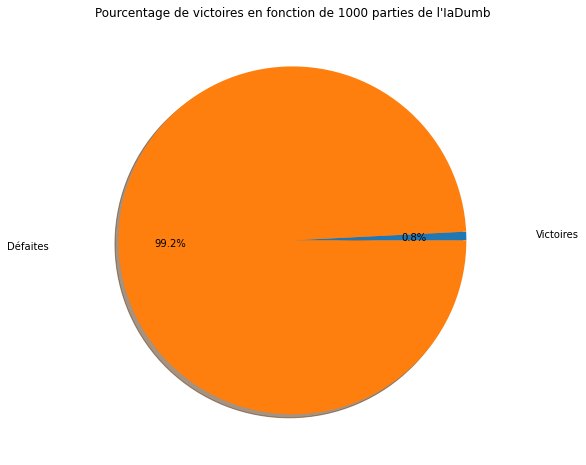

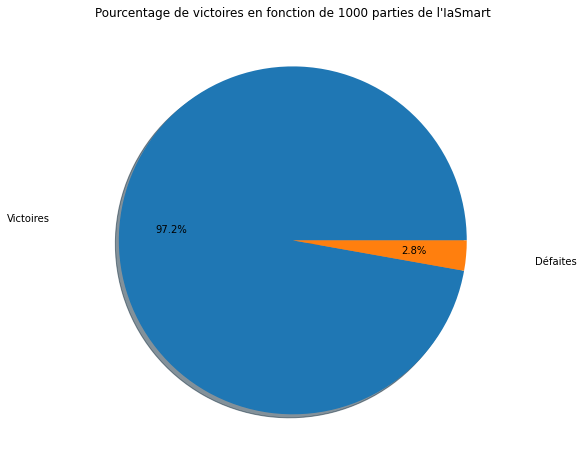

In [114]:
# Nombre et Pourcentage de victoires de l'IaDumb et de l'IaSmart sur 1000 parties.

# Le nombre de victoire de l'IaDumb est très faible et car elle remplit la 
# grille de manière aléatoire. Quand on sait qu'il y a une chance sur 1680 de 
# trouver la combinaison gagnante sans prendre en compte les couleurs bien et mal
# placées, il parait logique que l'IaDumb ne dépasse presque jamais les 1% de 
# réussites sur 1000 parties.

# A contrario, l'IaSmart a un grand nombre de victoire élevé car sa classe est
# dotée de fonctions qui testent des combinaisons en prenant en compte les
# couleurs bien et mal placées tout en éliminant les combinaisons impossibles. 
# L'IaSmart s'approche donc des 100% de réussites avec des résultats avoisinant
# les 96 à 98% en moyenne sur 1000 parties. 

# On notera aussi que l'IaSmart met en moyenne 7 tours pour trouver la bonne 
# solution. Avec l'IaDumb, c'est encore une fois aléatoire.

NB_ESSAI = 1000

md1 = IaDumb(user='francois', n_games= NB_ESSAI)
md1.lancer_n_parties()

md2= IaSmart(user='loic', n_games= NB_ESSAI)
md2.lancer_n_parties()

dumbV = md1.compteur_victoires
dumbD = md1.n_games - md1.compteur_victoires
resultats_Dumb = [dumbV, dumbD]

smartV = md2.compteur_victoires
smartD = md2.n_games - md2.compteur_victoires
resultats_Smart = [smartV, smartD]

moyenneDumb = statistics.mean(md1.tours_necessaires_victoire)
moy_round_dumb = round(moyenneDumb, 2)
moyenneSmart = statistics.mean(md2.tours_necessaires_victoire)
moy_round_smart = round(moyenneSmart, 2)

print(f"IaDumb : {md1.compteur_victoires} victoires sur {md1.n_games} parties - soit un taux de {'{:%}'.format(md1.compteur_victoires / md1.n_games)}")
print(f'Elle met en moyenne {moy_round_dumb} tours pour gagner.')
print(f"IaSmart : {md2.compteur_victoires} victoires sur {md2.n_games} parties - soit un taux de {'{:%}'.format(md2.compteur_victoires / md2.n_games)}")
print(f'Elle met en moyenne {moy_round_smart} tours pour gagner.')

pyplot.figure(figsize = (8, 8))
pyplot.pie(resultats_Dumb, labels = ["Victoires", "Défaites"],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.title(f"Pourcentage de victoires en fonction de {NB_ESSAI} parties de l'IaDumb")

pyplot.figure(figsize = (8, 8))
pyplot.pie(resultats_Smart, labels = ['Victoires', 'Défaites'], 
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.title(f"Pourcentage de victoires en fonction de {NB_ESSAI} parties de l'IaSmart")
